In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
import math
from matplotlib import pyplot as plt
import random
from scipy.optimize import minimize
from qiskit.circuit.library import RZZGate
import networkx as nx
from qiskit.providers.aer import StatevectorSimulator
from qiskit.quantum_info import Statevector
import seaborn as sns

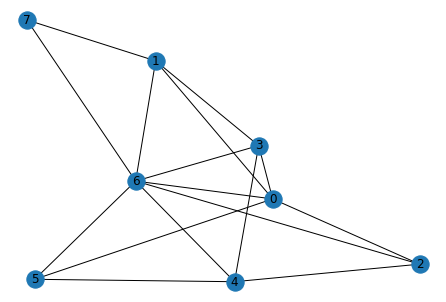

In [2]:
N = 8
graph=[(0, 1,1.0 ),(0, 2,2.0 ),(0, 3,5.0 ),(0, 5,1.0 ),(0, 6,3.0 ),(1, 3,2.0 ),(1, 6,1.0 ),(1, 7,4.0 ),
       (2, 4,1.0 ),(2, 6,1.0 ),(3, 4,2.0 ),(3, 6,3.0 ),(4, 5,1.0 ),(4, 6,1.0 ),(5, 6,2.0 ),(6, 7,1.0 )] 
G=nx.Graph()
G.add_weighted_edges_from(graph)
nx.draw(G,with_labels=True)

In [3]:
A=np.zeros((int(N),int(N)))
for i in graph:
    A[i[0]][i[1]] = i[2]
    A[i[1]][i[0]] = i[2]

In [4]:
def initialization(circuit):
    for qubit in circuit.qubits:
        circuit.h(qubit)
    return circuit

In [5]:
def cost_unitary_layer(circuit,gamma):
    for edge in graph:
        if edge[1] == edge[0] + 1:
            circuit.append(RZZGate(gamma*edge[2]),[edge[0],edge[0]+1])
        if edge[1] != edge[0] + 1:
            circuit.swap(edge[1],edge[0]+1)
            circuit.append(RZZGate(gamma*edge[2]),[edge[0],edge[0]+1])
            circuit.swap(edge[1],edge[0]+1)
    circuit.barrier()
    return circuit

In [6]:
def mixture_unitary_layer(circuit,alpha):
    for qubit in circuit.qubits:
        circuit.rx(alpha,qubit)
    circuit.barrier()
    return circuit

In [7]:
def create_params(params):
    alphas = []
    gammas = []
    for i in range(int(len(params)/2)):
        gammas.append(params[2*i])
        alphas.append(params[2*i+1])
    return gammas , alphas

In [8]:
def anasatz(params):
    gammas, alphas = create_params(params)
    q = QuantumRegister(N)
    c = ClassicalRegister(N)
    circuit = QuantumCircuit(q,c)
    circuit = initialization(circuit)
    for i in range(n_layers):
        circuit = cost_unitary_layer(circuit, gammas[i])
        circuit = mixture_unitary_layer(circuit,alphas[i])
    #circuit.measure(circuit.qubits,c)
    
    
    simulator = StatevectorSimulator()
    result = execute(circuit,simulator).result()
    sv = result.get_statevector(circuit)
    states = Statevector(sv)
    counts = states.probabilities_dict(decimals=3)
    for key in counts.keys():
        counts[key] = int(1000*counts[key])
        
        
    results = counts.keys()
    new_res=[]
    for key in results:
        hold=[]
        for i in range(0,len(key)):
            hold.append(int(key[i]))
        for i in range(0,counts[key]):
            new_res.append(hold)
    return circuit,counts,new_res

In [9]:
def cost_function(params):
    circuit,counts,result = anasatz(params)
    total_cost = 0
    for i in range(len(result)):
        for edge in graph:
            total_cost += (A[edge[0]][edge[1]])*(1-2*result[i][edge[0]])*(1-2*result[i][edge[1]]) + (A[edge[1]][edge[0]])*(1-2*result[i][edge[1]])*(1-2*result[i][edge[0]])
    total_cost = total_cost/1024
    print("Cost: "+str(total_cost))
    return total_cost 

optimization for depth :1
Cost: 1.58203125
Cost: -1.31640625
Cost: -1.33984375
Cost: 0.32421875
Cost: -0.578125
Cost: 1.21484375
Cost: -0.51171875
Cost: 4.02734375
Cost: -0.46875
Cost: -1.13671875
Cost: -1.71875
Cost: -1.33203125
Cost: -1.71484375
Cost: -1.6171875
Cost: -2.25390625
Cost: -2.01953125
Cost: -1.9609375
Cost: -2.22265625
Cost: -2.23828125
Cost: -2.21484375
Cost: -2.0078125
Cost: -2.203125
Cost: -2.109375
Cost: -2.2890625
Cost: -2.28515625
Cost: -2.2890625
Cost: -2.25390625
Cost: -2.2890625
Cost: -2.2890625
Out:      fun: -2.2890625
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 29
  status: 1
 success: True
       x: array([ 3.60907177, -2.04308537])


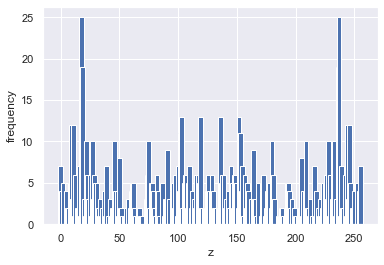

Z with maximum frequency is  :237


In [10]:
collect_counts = []
collect_costs = []
n_layers = 1
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :2
Cost: -3.140625
Cost: -1.50390625
Cost: 5.12109375
Cost: -0.23046875
Cost: -0.375
Cost: 8.2265625
Cost: 0.01171875
Cost: -3.4375
Cost: -0.91015625
Cost: -1.6953125
Cost: -0.765625
Cost: -5.08203125
Cost: -4.43359375
Cost: -4.83203125
Cost: -4.640625
Cost: -4.84765625
Cost: -4.765625
Cost: -5.6875
Cost: -5.72265625
Cost: -5.9140625
Cost: -5.9765625
Cost: -5.4453125
Cost: -6.51953125
Cost: -7.30859375
Cost: -7.125
Cost: -7.19140625
Cost: -6.9765625
Cost: -7.37890625
Cost: -6.828125
Cost: -7.1640625
Cost: -7.3828125
Cost: -6.94140625
Cost: -7.37109375
Cost: -7.6171875
Cost: -7.57421875
Cost: -7.4609375
Cost: -7.50390625
Cost: -7.51953125
Cost: -7.6015625
Cost: -7.44921875
Cost: -7.65234375
Cost: -7.6015625
Cost: -7.5
Cost: -7.65625
Cost: -7.62109375
Cost: -7.6484375
Cost: -7.65234375
Cost: -7.6015625
Cost: -7.65625
Cost: -7.65625
Cost: -7.65625
Cost: -7.65625
Cost: -7.65625
Cost: -7.65625
Cost: -7.65625
Cost: -7.65625
Out:      fun: -7.65625
   maxcv: 0.0
 messag

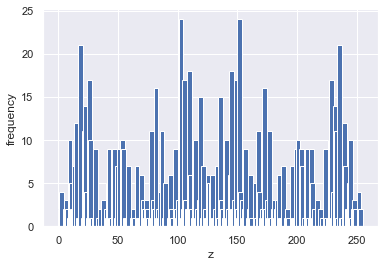

Z with maximum frequency is  :152


In [11]:
n_layers = 2
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :3
Cost: -3.45703125
Cost: -0.015625
Cost: -2.75
Cost: -0.6796875
Cost: 0.26171875
Cost: -1.33203125
Cost: -1.734375
Cost: 0.01953125
Cost: 8.69921875
Cost: -1.33984375
Cost: -3.203125
Cost: 0.046875
Cost: -2.6953125
Cost: -3.9765625
Cost: -3.8515625
Cost: 0.35546875
Cost: -1.671875
Cost: -3.58984375
Cost: -4.03125
Cost: -4.3671875
Cost: -3.7578125
Cost: -4.00390625
Cost: -3.56640625
Cost: -3.91015625
Cost: -4.14453125
Cost: -4.37109375
Cost: -4.43359375
Cost: -4.24609375
Cost: -4.1796875
Cost: -4.50390625
Cost: -4.1015625
Cost: -4.8515625
Cost: -5.42578125
Cost: -5.47265625
Cost: -5.58984375
Cost: -5.203125
Cost: -5.890625
Cost: -6.2578125
Cost: -5.8359375
Cost: -6.015625
Cost: -6.33984375
Cost: -6.35546875
Cost: -6.2734375
Cost: -6.27734375
Cost: -6.53125
Cost: -6.82421875
Cost: -6.55078125
Cost: -6.47265625
Cost: -6.45703125
Cost: -6.4921875
Cost: -6.7265625
Cost: -6.578125
Cost: -6.59765625
Cost: -6.5390625
Cost: -6.69921875
Cost: -6.52734375
Cost: -6.578125


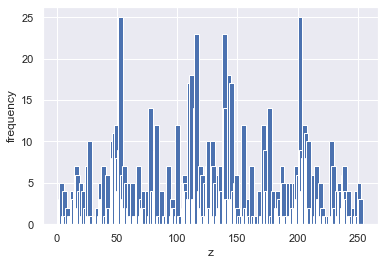

Z with maximum frequency is  :202


In [12]:
n_layers = 3
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :4
Cost: 3.22265625
Cost: 1.5234375
Cost: -1.30078125
Cost: -1.17578125
Cost: -1.91015625
Cost: 2.40234375
Cost: -1.52734375
Cost: 0.10546875
Cost: 1.33203125
Cost: 0.54296875
Cost: -1.3515625
Cost: -0.40234375
Cost: 3.4921875
Cost: -4.37890625
Cost: -2.828125
Cost: -2.875
Cost: -4.875
Cost: -5.03125
Cost: -2.74609375
Cost: -4.8828125
Cost: -2.609375
Cost: -3.6796875
Cost: -1.4609375
Cost: -4.47265625
Cost: -4.4296875
Cost: -4.45703125
Cost: -4.75390625
Cost: -4.765625
Cost: -4.8671875
Cost: -5.203125
Cost: -5.0859375
Cost: -5.19921875
Cost: -5.421875
Cost: -5.47265625
Cost: -5.375
Cost: -5.32421875
Cost: -5.40234375
Cost: -5.3671875
Cost: -5.29296875
Cost: -5.421875
Cost: -5.3515625
Cost: -5.296875
Cost: -5.50390625
Cost: -5.61328125
Cost: -5.390625
Cost: -5.5546875
Cost: -5.53515625
Cost: -5.625
Cost: -5.44140625
Cost: -5.54296875
Cost: -5.48828125
Cost: -5.390625
Cost: -5.4453125
Cost: -5.41015625
Cost: -5.47265625
Cost: -5.5625
Cost: -5.58203125
Cost: -5.5
Co

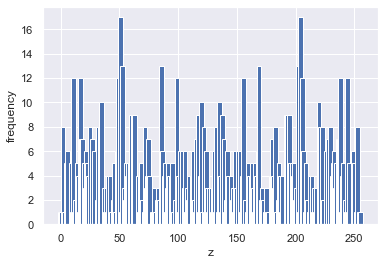

Z with maximum frequency is  :204


In [15]:
n_layers = 4
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :5
Cost: 2.5859375
Cost: 0.20703125
Cost: -0.34765625
Cost: -0.06640625
Cost: 0.26953125
Cost: 3.8828125
Cost: -3.09375
Cost: -0.671875
Cost: -4.1328125
Cost: 0.10546875
Cost: -0.19140625
Cost: 0.73828125
Cost: -0.97265625
Cost: -3.8046875
Cost: -0.921875
Cost: -3.23046875
Cost: 0.078125
Cost: -1.73828125
Cost: -1.1015625
Cost: -1.63671875
Cost: -3.65234375
Cost: -3.02734375
Cost: -3.73046875
Cost: -4.1171875
Cost: -3.265625
Cost: -4.05859375
Cost: -3.86328125
Cost: -3.80078125
Cost: -4.08984375
Cost: -4.2109375
Cost: -4.01953125
Cost: -4.44140625
Cost: -4.31640625
Cost: -4.203125
Cost: -4.2265625
Cost: -4.3125
Cost: -4.484375
Cost: -4.28515625
Cost: -4.4609375
Cost: -4.0703125
Cost: -4.0703125
Cost: -4.58984375
Cost: -4.35546875
Cost: -4.47265625
Cost: -4.24609375
Cost: -4.2890625
Cost: -4.54296875
Cost: -4.33984375
Cost: -4.5078125
Cost: -4.34375
Cost: -4.46484375
Cost: -4.41015625
Cost: -4.4375
Cost: -4.34375
Cost: -4.44921875
Cost: -4.49609375
Cost: -4.539062

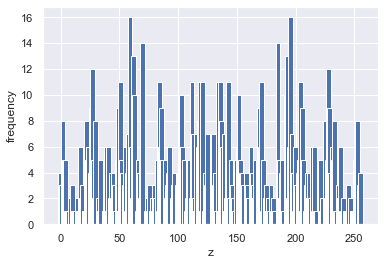

Z with maximum frequency is  :196


In [16]:
n_layers = 5
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :6
Cost: -1.14453125
Cost: -1.94140625
Cost: 2.31640625
Cost: 1.68359375
Cost: -1.67578125
Cost: 2.9921875
Cost: 2.796875
Cost: 2.9375
Cost: -2.05859375
Cost: 3.9453125
Cost: -3.1875
Cost: 3.046875
Cost: -0.43359375
Cost: -3.125
Cost: 0.69140625
Cost: -0.65234375
Cost: -3.55859375
Cost: -3.43359375
Cost: -0.4765625
Cost: -2.73828125
Cost: -2.546875
Cost: -3.58984375
Cost: -2.0078125
Cost: -2.43359375
Cost: -3.63671875
Cost: -3.33984375
Cost: -3.08984375
Cost: -1.3515625
Cost: 0.796875
Cost: -1.88671875
Cost: -0.68359375
Cost: -4.17578125
Cost: -3.51171875
Cost: -2.45703125
Cost: -4.390625
Cost: -4.64453125
Cost: -4.9296875
Cost: -3.1015625
Cost: -2.9296875
Cost: -1.03515625
Cost: -3.52734375
Cost: -1.29296875
Cost: -4.95703125
Cost: -4.44140625
Cost: -3.0234375
Cost: -4.875
Cost: -4.44140625
Cost: -4.83984375
Cost: -4.85546875
Cost: -3.9609375
Cost: -2.73828125
Cost: -5.0
Cost: -4.09765625
Cost: -4.63671875
Cost: -4.02734375
Cost: -4.6640625
Cost: -5.11328125
Cos

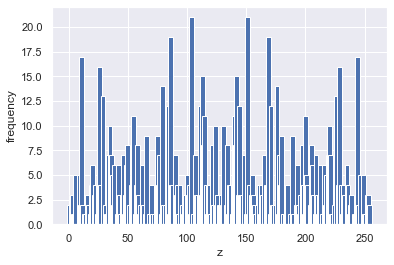

Z with maximum frequency is  :151


In [17]:
n_layers = 6
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :7
Cost: -0.57421875
Cost: 2.69140625
Cost: 0.04296875
Cost: 2.62109375
Cost: -1.1875
Cost: -1.37890625
Cost: -3.42578125
Cost: 2.1640625
Cost: -1.59375
Cost: -2.640625
Cost: -2.69921875
Cost: -2.09765625
Cost: -1.5390625
Cost: -1.77734375
Cost: 0.90234375
Cost: 1.109375
Cost: -1.30859375
Cost: -2.0703125
Cost: -1.14453125
Cost: -3.7265625
Cost: -2.25
Cost: -1.484375
Cost: -2.01953125
Cost: -3.390625
Cost: -3.9140625
Cost: -0.48828125
Cost: -1.6015625
Cost: -3.4140625
Cost: -4.45703125
Cost: -4.53125
Cost: -4.2109375
Cost: -3.55859375
Cost: -4.54296875
Cost: 0.21875
Cost: -4.9140625
Cost: -3.1328125
Cost: -4.95703125
Cost: -4.1484375
Cost: -1.86328125
Cost: -4.95703125
Cost: -5.265625
Cost: -5.59375
Cost: -2.328125
Cost: -5.19140625
Cost: -5.71484375
Cost: -5.64453125
Cost: -3.44921875
Cost: -5.515625
Cost: -5.4921875
Cost: -5.84375
Cost: -5.2109375
Cost: -5.4140625
Cost: -4.26171875
Cost: -5.515625
Cost: -4.89453125
Cost: -4.6640625
Cost: -5.71875
Cost: -5.22265

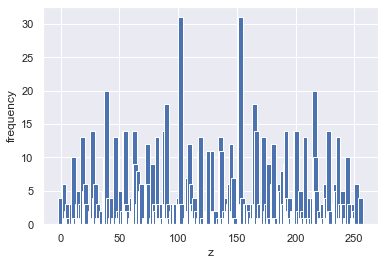

Z with maximum frequency is  :153


In [18]:
n_layers = 7
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :8
Cost: -1.96484375
Cost: 1.20703125
Cost: 1.12890625
Cost: 0.421875
Cost: 2.5
Cost: 1.27734375
Cost: 0.734375
Cost: 0.17578125
Cost: 0.01171875
Cost: 2.33203125
Cost: 0.52734375
Cost: -2.42578125
Cost: -0.94140625
Cost: 0.74609375
Cost: -2.0546875
Cost: -2.359375
Cost: 0.06640625
Cost: -0.5859375
Cost: -0.953125
Cost: -3.75390625
Cost: -4.03125
Cost: -1.55078125
Cost: -0.58984375
Cost: -2.8828125
Cost: -1.41796875
Cost: -1.671875
Cost: -1.66796875
Cost: -4.8203125
Cost: -3.94921875
Cost: -4.18359375
Cost: 1.67578125
Cost: -1.00390625
Cost: -2.15234375
Cost: -3.81640625
Cost: 2.49609375
Cost: -3.703125
Cost: 1.3984375
Cost: -3.7890625
Cost: -1.35546875
Cost: -1.05078125
Cost: -4.45703125
Cost: -2.859375
Cost: -3.97265625
Cost: -4.15625
Cost: -4.75
Cost: -4.3046875
Cost: -5.046875
Cost: -4.40234375
Cost: -5.19140625
Cost: -5.83203125
Cost: -4.62109375
Cost: -4.20703125
Cost: -6.08984375
Cost: -7.17578125
Cost: -7.296875
Cost: -7.234375
Cost: -5.73046875
Cost: -6.

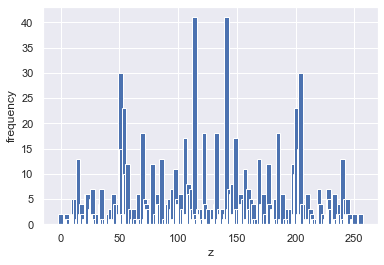

Z with maximum frequency is  :141


In [19]:
n_layers = 8
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

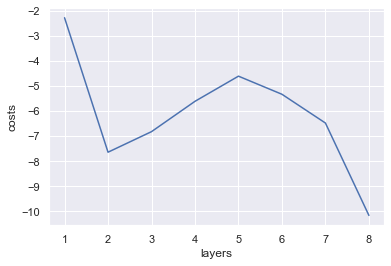

In [20]:
x = [1,2,3,4,5,6,7,8]
y = collect_costs
plt.plot(x,y)
plt.xlabel("layers")
plt.ylabel("costs")
plt.show()

In [21]:
best_cost_brute = 0
for b in range(2**N):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(N)))]
    cost = 0
    for i in range(N):
        for j in range(N):
            cost = cost + A[i,j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    #print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(N)]

print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))


Best solution = [1, 1, 0, 0, 1, 0, 1, 0] cost = 25.0
